In [3]:
!pip install torch

In [4]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 27.8 MB/s eta 0:00:00


In [5]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import Dataset,DataLoader
import optuna
import torch.nn as nn

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Autograd


In [ ]:
x = torch.tensor(3.0, requires_grad=True)

In [ ]:
x

tensor(3., requires_grad=True)

In [ ]:
y = x**2

In [ ]:
y.backward()

In [ ]:
x.grad

tensor(6.)

# Basic NN pipeline using Autograd

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.drop(columns=['id','Unnamed: 32'], axis=1, inplace=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

In [11]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [12]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [13]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [ ]:
class MySimpleNN():

  def __init__(self, X):

    self.weights = torch.rand(X.shape[1], 1, dtype=torch.float64, requires_grad=True)
    self.bias = torch.zeros(1, dtype=torch.float64, requires_grad=True)

  def forward(self, X):
    z = torch.matmul(X, self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss_function(self, y_pred, y):
    # Clamp predictions to avoid log(0)
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # Calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
    return loss

In [ ]:
epochs = 25
learning_rate = 0.1

In [ ]:
model = MySimpleNN(X_train_tensor)

In [ ]:
for epoch in range(epochs):

  y_pred = model.forward(X_train_tensor)

  loss = model.loss_function( y_pred , y_train_tensor)

  loss.backward()

  #now for updation no need of add this into DCG(dynamic computation graph)
  with torch.no_grad():
    model.weights -= learning_rate * model.weights.grad
    model.bias -= learning_rate * model.bias.grad

  model.weights.grad.zero_()
  model.bias.grad.zero_()

  print(f'epoch : {epoch+1} , loss : {loss.item()}')

epoch : 1 , loss : 3.641935817326634
epoch : 2 , loss : 3.525171469333716
epoch : 3 , loss : 3.404200825864371
epoch : 4 , loss : 3.280857935939187
epoch : 5 , loss : 3.1546629116426708
epoch : 6 , loss : 3.025235212154597
epoch : 7 , loss : 2.889736975189271
epoch : 8 , loss : 2.7484364613954333
epoch : 9 , loss : 2.6036534840833876
epoch : 10 , loss : 2.4491347588218253
epoch : 11 , loss : 2.2932683224029624
epoch : 12 , loss : 2.142873683571512
epoch : 13 , loss : 1.996843514205838
epoch : 14 , loss : 1.8589282945428487
epoch : 15 , loss : 1.7282655902460886
epoch : 16 , loss : 1.6018960842037244
epoch : 17 , loss : 1.4846494754446968
epoch : 18 , loss : 1.3802637977801713
epoch : 19 , loss : 1.2890619574357296
epoch : 20 , loss : 1.2108911560624744
epoch : 21 , loss : 1.14471835854993
epoch : 22 , loss : 1.0872938960079728
epoch : 23 , loss : 1.0396600755675085
epoch : 24 , loss : 0.9997022656485353
epoch : 25 , loss : 0.9674538458712352


In [ ]:
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred_class = (y_pred > 0.9).float()
  acc = (y_pred_class == y_test_tensor).float().mean()
  print(f'accuracy: {acc.item()*100:.2f}%')

accuracy: 58.31%


# NN Module


In [ ]:
#till the 9th cell all remain as it is of above section

In [ ]:
class MySimpleNN(torch.nn.Module):

  def __init__(self,X):
    super().__init__()
    self.linear = torch.nn.Linear(X.shape[1], 1, dtype=torch.float32)
    self.sigmoid = torch.nn.Sigmoid().float()

  def forward(self, X):
    z = self.linear(X)
    y_pred = self.sigmoid(z)
    return y_pred

In [ ]:
model = MySimpleNN(X_train_tensor)

In [ ]:
epochs = 25
learning_rate = 0.1

In [ ]:
loss_function = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(epochs):
  y_pred = model(X_train_tensor)

  loss = loss_function(y_pred.float(), y_train_tensor.view(-1, 1).float())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  print(f'Epochs: {epoch + 1},Loss: {loss.item()}')

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

In [ ]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')


# Dataset and DataLoader

In [ ]:
class CustomDataset(Dataset):

  def __init__(self,features,labels):
    self.features = features
    self.labels = labels

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]


In [ ]:
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [ ]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [ ]:
class MySimpleNN(torch.nn.Module):

  def __init__(self,X):
    super().__init__()
    self.linear = torch.nn.Linear(X.shape[1], 1, dtype=torch.float32)
    self.sigmoid = torch.nn.Sigmoid().float()

  def forward(self, X):
    z = self.linear(X)
    y_pred = self.sigmoid(z)
    return y_pred

In [ ]:
for epoch in range(epochs):
  for batch_features, batch_labels in train_loader:
    y_pred = model(batch_features)

    loss = loss_function(y_pred.float(), y_train_tensor.view(-1, 1).float())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    print(f'Epochs: {epoch + 1},Loss: {loss.item()}')

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

In [ ]:
model = MySimpleNN(X_train_tensor)

In [ ]:
epochs = 25
learning_rate = 0.1

In [ ]:
loss_function = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(epochs):
  for batch_features, batch_labels in train_loader:
    y_pred = model(batch_features)

    loss = loss_function(y_pred.float(), y_train_tensor.view(-1, 1).float())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    print(f'Epochs: {epoch + 1},Loss: {loss.item()}')

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

In [ ]:
# Model evaluation using test_loader
model.eval()  # Set the model to evaluation mode
accuracy_list = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        # Forward pass
        y_pred = model(batch_features)
        y_pred = (y_pred > 0.8).float()  # Convert probabilities to binary predictions

        # Calculate accuracy for the current batch
        batch_accuracy = (y_pred.view(-1) == batch_labels).float().mean().item()
        accuracy_list.append(batch_accuracy)

# Calculate overall accuracy
overall_accuracy = sum(accuracy_list) / len(accuracy_list)
print(f'Accuracy: {overall_accuracy:.4f}')


RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

# FashionMNIST using Dataset and Dataloader

In [14]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "fashion-mnist_train.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zalando-research/fashionmnist",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-251015765.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'fashionmnist' dataset.
First 5 records:    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0     

In [15]:
df = df.head(6000)
print("First 5 records of the new df:", df.head())
print("Number of rows in the new df:", len(df))

First 5 records of the new df:    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  

In [16]:
X_train = df.iloc[:, 1:].values
y_train = df.iloc[:, 0].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [18]:
X_train = X_train/255.0
X_test = X_test/255.0

In [19]:
class CustomDataset(Dataset):

    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


In [ ]:
#for  CNN
class CustomDataset(Dataset):

    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32).reshape(-1,1, 28, 28)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


In [20]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [21]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [ ]:
import torch.nn as nn
import torch.optim as optim

class MyNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [26]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [ ]:
# instatiate the model
model = MyNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [ ]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

# Optina FashionMNIST

In [ ]:
#cell 104 to 114 as it

In [ ]:
class MyNN(torch.nn.Module):

  def __init__(self,input_dim,output_dim,num_hidden_layer,neurons_per_layer,dropout):

    super().__init__()

    layers = []

    for i in range(num_hidden_layer):
        layers.append(nn.Linear(input_dim, neurons_per_layer))
        layers.append(nn.BatchNorm1d(neurons_per_layer))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(p=dropout))
        input_dim = neurons_per_layer

    layers.append(nn.Linear(neurons_per_layer, output_dim))

    self.model = nn.Sequential(*layers)

  def forward(self, X):
    return self.model(X)


In [ ]:
def objective(trial):
  num_hidden_layer = trial.suggest_int('num_hidden_layer', 1, 5)
  neurons_per_layer = trial.suggest_int('neurons_per_layer', 8, 128, step=8)
  dropout = trial.suggest_float('dropout', 0.1, 0.5, step=0.1)

  train_loader = DataLoader(train_dataset , batch_size=32 , shuffle=True)
  test_loader = DataLoader(test_dataset , batch_size=32 , shuffle=False)

  input_dim = 784
  output_dim = 10

  model = MyNN(input_dim,output_dim,num_hidden_layer,neurons_per_layer,dropout)

  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  for epoch in range(epochs):

    for batch_features, batch_labels in train_loader:

      y_pred = model(batch_features)

      loss = loss_function(y_pred, batch_labels)

      optimizer.zero_grad()

      loss.backward()

      optimizer.step()

  model.eval()

  total = 0
  correct = 0

  with torch.no_grad():

    for batch_features, batch_labels in test_loader:

      y_pred = model(batch_features)

      _, predicted = torch.max(y_pred.data, 1)

      total += batch_labels.size(0)
      correct += (predicted == batch_labels).sum().item()

    accuracy = 100 * correct / total

  return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2025-10-18 04:16:10,559] A new study created in memory with name: no-name-6751bd44-18ca-40c8-8356-3da19dfb3515
[I 2025-10-18 04:16:42,217] Trial 0 finished with value: 100.0 and parameters: {'num_hidden_layer': 4, 'neurons_per_layer': 64, 'dropout': 0.30000000000000004}. Best is trial 0 with value: 100.0.
[I 2025-10-18 04:17:01,083] Trial 1 finished with value: 100.0 and parameters: {'num_hidden_layer': 1, 'neurons_per_layer': 88, 'dropout': 0.1}. Best is trial 0 with value: 100.0.
[I 2025-10-18 04:17:26,728] Trial 2 finished with value: 100.0 and parameters: {'num_hidden_layer': 2, 'neurons_per_layer': 112, 'dropout': 0.2}. Best is trial 0 with value: 100.0.
[I 2025-10-18 04:17:54,927] Trial 3 finished with value: 100.0 and parameters: {'num_hidden_layer': 3, 'neurons_per_layer': 72, 'dropout': 0.1}. Best is trial 0 with value: 100.0.
[I 2025-10-18 04:18:16,408] Trial 4 finished with value: 100.0 and parameters: {'num_hidden_layer': 1, 'neurons_per_layer': 112, 'dropout': 0.2}. Bes

In [ ]:
study.best_value

100.0

# CNN FashionMNIST


In [ ]:
# do required step from above sells

In [31]:
import torch.nn as nn
import torch.optim as optim

class MYCNN(nn.Module):
    def __init__(self, input_feature):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(input_feature, 32, kernel_size=3 , padding = 'same'),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3 , padding = 'same'),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7 , 128),
            nn.ReLU(),
            nn.Dropout(p=0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=0.3),

            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [ ]:
#run some sells required.

In [32]:
# instatiate the model
model = MYCNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [ ]:
# instatiate the model for CNNNNNNNNNN
model = MYCNN(1)

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [33]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.9481124866008759
Epoch: 2 , Loss: 0.5937423568964004
Epoch: 3 , Loss: 0.4922902261217435
Epoch: 4 , Loss: 0.4249120886127154
Epoch: 5 , Loss: 0.374395148580273
Epoch: 6 , Loss: 0.3493433831632137
Epoch: 7 , Loss: 0.32863549614946047
Epoch: 8 , Loss: 0.2906387224793434
Epoch: 9 , Loss: 0.27091990056137244
Epoch: 10 , Loss: 0.24554967017223436
Epoch: 11 , Loss: 0.21695492319762708
Epoch: 12 , Loss: 0.2168485192830364
Epoch: 13 , Loss: 0.20550900849203269
Epoch: 14 , Loss: 0.18712161439160505
Epoch: 15 , Loss: 0.18934133579333623
Epoch: 16 , Loss: 0.1603594495045642
Epoch: 17 , Loss: 0.15338418347140154
Epoch: 18 , Loss: 0.15199346935997407
Epoch: 19 , Loss: 0.14347378966398538
Epoch: 20 , Loss: 0.12092750752344728
Epoch: 21 , Loss: 0.10780199913308025
Epoch: 22 , Loss: 0.09898362302454189
Epoch: 23 , Loss: 0.11165239964146167
Epoch: 24 , Loss: 0.10382100226047139
Epoch: 25 , Loss: 0.0846105806529522
Epoch: 26 , Loss: 0.08034321104486783
Epoch: 27 , Loss: 0.062567229873

In [35]:
model.eval()

MYCNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.3, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [36]:

total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, prediction = torch.max(outputs.data, 1)

    total += batch_labels.size(0)
    correct += (prediction == batch_labels).sum().item()

accuracy = 100 * correct / total

print(f'Accuracy: {accuracy}')

Accuracy: 89.41666666666667


In [37]:

total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    outputs = model(batch_features)

    _, prediction = torch.max(outputs.data, 1)

    total += batch_labels.size(0)
    correct += (prediction == batch_labels).sum().item()

accuracy = 100 * correct / total

print(f'Accuracy: {accuracy}')

Accuracy: 99.9375


# Transfer Learning

In [11]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "fashion-mnist_train.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zalando-research/fashionmnist",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-251015765.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'fashionmnist' dataset.
First 5 records:    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0     

In [7]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [8]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [12]:
df = df.head(6000)
print("First 5 records of the new df:", df.head())
print("Number of rows in the new df:", len(df))

First 5 records of the new df:    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  

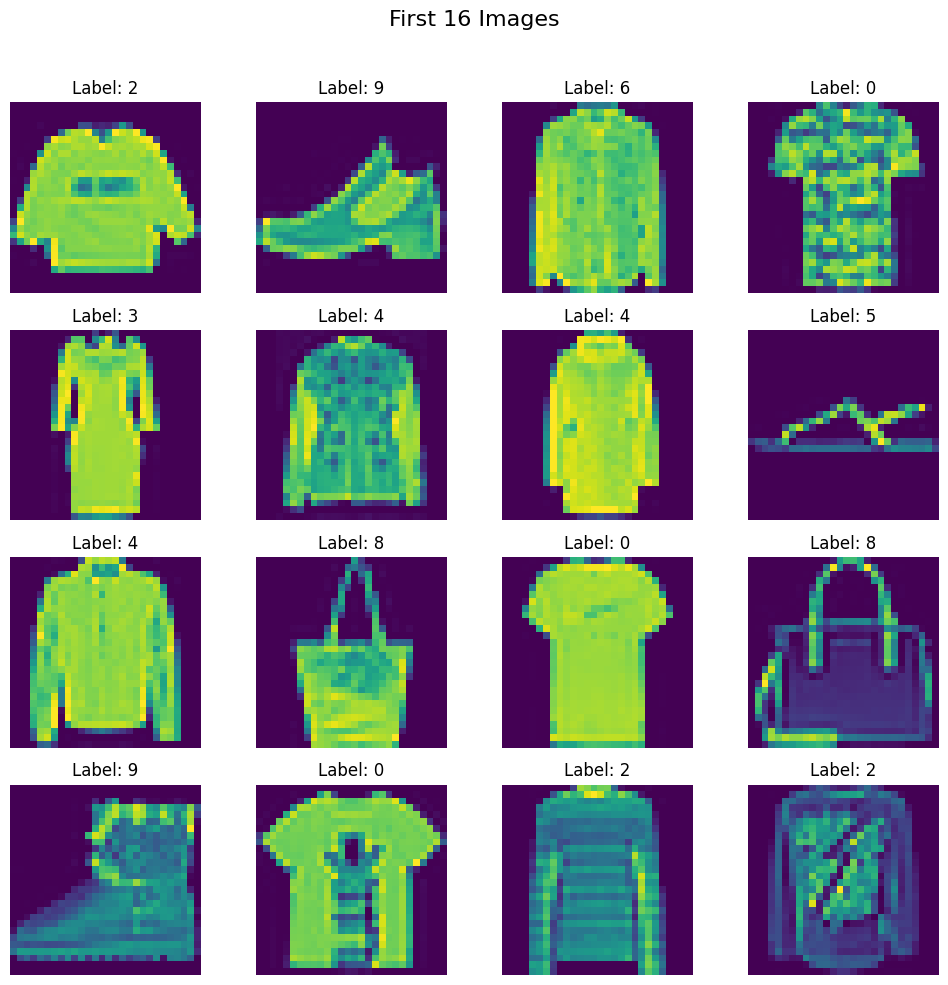

In [15]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [13]:
X_train = df.iloc[:, 1:].values
y_train = df.iloc[:, 0].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [26]:
from torchvision.transforms import transforms

custom_transform =  transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [39]:
from PIL import Image
import numpy as np

class CustomDataset(Dataset):

  def __init__( self, features, labels , transform):
    self.features = features
    self.labels = labels
    self.transform = transform

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):

    # 2D image : Fashion MNIST 1D to reshape(28,28)
    image = self.features[index].reshape(28,28)

    # Image must be in PIL(python imaging Library) format : change datatype(np.uint8)
    image = image.astype(np.uint8)

    # Color image : (1,28,28) => (3,28,28) tensor
    image = np.stack([image]*3, axis=-1)

    # Tensor converted into PIL image
    image = Image.fromarray(image)

    #apply transforms
    image = self.transform(image)

    #return
    return image, torch.tensor(self.labels[index],dtype = torch.long)

In [40]:
train_dataset = CustomDataset(X_train, y_train,transform = custom_transform)
test_dataset = CustomDataset(X_test, y_test, transform = custom_transform)

In [41]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [31]:
# fetch the pretrained model

import torchvision.models as models

vgg16 = models.vgg16(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:05<00:00, 92.6MB/s]


In [32]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [33]:
for param in vgg16.features.parameters():
  param.requires_grad=False

In [34]:
vgg16.classifier = nn.Sequential(
    nn.Linear(25088, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 10)
)

In [35]:
vgg16 = vgg16.to(device)

In [36]:
learning_rate = 0.0001
epochs = 10

In [37]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier.parameters(), lr=learning_rate)

In [42]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = vgg16(batch_features)

    print(outputs.shape)
    print(batch_labels.shape)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

    break

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


torch.Size([32, 10])
torch.Size([32])
Epoch: 1 , Loss: 0.015339447657267252
torch.Size([32, 10])
torch.Size([32])
Epoch: 2 , Loss: 0.015096940994262696
torch.Size([32, 10])
torch.Size([32])
Epoch: 3 , Loss: 0.014729544321695964
torch.Size([32, 10])
torch.Size([32])
Epoch: 4 , Loss: 0.014541714986165365
torch.Size([32, 10])
torch.Size([32])
Epoch: 5 , Loss: 0.01403119405110677
torch.Size([32, 10])
torch.Size([32])
Epoch: 6 , Loss: 0.013625288009643554
torch.Size([32, 10])
torch.Size([32])
Epoch: 7 , Loss: 0.013557624816894532
torch.Size([32, 10])
torch.Size([32])
Epoch: 8 , Loss: 0.013167554537455241
torch.Size([32, 10])
torch.Size([32])
Epoch: 9 , Loss: 0.011959298451741537
torch.Size([32, 10])
torch.Size([32])
Epoch: 10 , Loss: 0.012084218660990397


In [45]:
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [46]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = vgg16(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.7091666666666666


In [50]:
# evaluation on training data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = vgg16(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.726875


# RNN

In [18]:
import torch
from torch.utils.data import Dataset, DataLoader

In [4]:
import google.colab.files as files
uploaded = files.upload()

Saving 100_Unique_QA_Dataset.csv to 100_Unique_QA_Dataset.csv


In [5]:
import pandas as pd
import io

# Assuming the uploaded file name is available in the 'uploaded' dictionary
# If you uploaded a different file, replace the key with the correct filename
for filename in uploaded.keys():
  df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
  print(f"DataFrame created from {filename}")
  display(df.head()) # Display the first 5 rows of the dataframe

DataFrame created from 100_Unique_QA_Dataset.csv


,question,answer
0,What is the capital of France?,Paris
1,What is the capital of Germany?,Berlin
2,Who wrote 'To Kill a Mockingbird'?,Harper-Lee
3,What is the largest planet in our solar system?,Jupiter
4,What is the boiling point of water in Celsius?,100


In [6]:
#tokenize
def tokenize(text):
  text = text.lower()
  text = text.replace('?','')
  text = text.replace('!','')
  text = text.replace(',','')
  text = text.replace('.','')
  text = text.replace('(','')
  text = text.replace(')','')
  return text.split()

In [7]:
tokenize('What is the capital of France?')

['what', 'is', 'the', 'capital', 'of', 'france']

In [8]:
Vocab = {'<UNK>':0}

In [9]:
def build_vocab(row):
  # print(row['question'],row['answer'])
  tokenize_question = tokenize(row['question'])
  tokenize_answer = tokenize(row['answer'])
  # print(tokenize_question,tokenize_answer)
  merged_token = tokenize_question + tokenize_answer
  # print(merged_token)
  for token in merged_token:
    if token not in Vocab:
      Vocab[token] = len(Vocab)

In [10]:
df.apply(build_vocab,axis=1)

,0
0,None
1,None
2,None
3,None
4,None
...,...
85,None
86,None
87,None
88,None


In [11]:
Vocab

{'<UNK>': 0,
 'what': 1,
 'is': 2,
 'the': 3,
 'capital': 4,
 'of': 5,
 'france': 6,
 'paris': 7,
 'germany': 8,
 'berlin': 9,
 'who': 10,
 'wrote': 11,
 "'to": 12,
 'kill': 13,
 'a': 14,
 "mockingbird'": 15,
 'harper-lee': 16,
 'largest': 17,
 'planet': 18,
 'in': 19,
 'our': 20,
 'solar': 21,
 'system': 22,
 'jupiter': 23,
 'boiling': 24,
 'point': 25,
 'water': 26,
 'celsius': 27,
 '100': 28,
 'painted': 29,
 'mona': 30,
 'lisa': 31,
 'leonardo-da-vinci': 32,
 'square': 33,
 'root': 34,
 '64': 35,
 '8': 36,
 'chemical': 37,
 'symbol': 38,
 'for': 39,
 'gold': 40,
 'au': 41,
 'which': 42,
 'year': 43,
 'did': 44,
 'world': 45,
 'war': 46,
 'ii': 47,
 'end': 48,
 '1945': 49,
 'longest': 50,
 'river': 51,
 'nile': 52,
 'japan': 53,
 'tokyo': 54,
 'developed': 55,
 'theory': 56,
 'relativity': 57,
 'albert-einstein': 58,
 'freezing': 59,
 'fahrenheit': 60,
 '32': 61,
 'known': 62,
 'as': 63,
 'red': 64,
 'mars': 65,
 'author': 66,
 "'1984'": 67,
 'george-orwell': 68,
 'currency': 69,
 '

In [124]:
# convert words to numerical indices
def text_to_indices(text, vocab):

  indexed_text = []

  for token in tokenize(text):

    if token in vocab:
      indexed_text.append(vocab[token])
    else:
      indexed_text.append(vocab['<UNK>'])

  return indexed_text

In [28]:
len(Vocab)

326

In [126]:
print(text_to_indices("What is CampushX",Vocab))

[1, 2, 0]


In [125]:
from torch.utils.data import Dataset, DataLoader
class QADataset(Dataset):

  def __init__(self, df, vocab):
    self.df = df
    self.vocab = vocab

  def __len__(self):
    return self.df.shape[0]

  def __getitem__(self, index):

    numerical_question = text_to_indices(self.df.iloc[index]['question'], self.vocab)
    numerical_answer = text_to_indices(self.df.iloc[index]['answer'], self.vocab)

    return torch.tensor(numerical_question), torch.tensor(numerical_answer)

In [127]:
dataset = QADataset(df, Vocab)

In [128]:
dataset[0]

(tensor([1, 2, 3, 4, 5, 6]), tensor([7]))

In [129]:
dataloader = DataLoader(dataset, batch_size=1 , shuffle=True)

In [130]:
import torch.nn as nn

In [131]:
class SimpleRNN(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_dim=50)
    self.rnn = nn.RNN(50, 64, batch_first=True)
    self.fc = nn.Linear(64, vocab_size)

  def forward(self, question):
    embedded_question = self.embedding(question)
    hidden, final = self.rnn(embedded_question)
    output = self.fc(final.squeeze(0))

    return output

In [82]:
X = nn.Embedding(326, embedding_dim=50)

In [83]:
xx = X(dataset[15][0])

In [84]:
y = nn.RNN(50,64)

In [85]:
len(y(xx))

2

In [86]:
learning_rate = 0.001
epochs = 20

In [132]:
model = SimpleRNN(len(Vocab))

In [138]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [139]:
# training loop

for epoch in range(epochs):

  total_loss = 0

  for question, answer in dataloader:

    optimizer.zero_grad()

    # forward pass
    output = model(question)

    # loss -> output shape (1,324) - (1)
    loss = criterion(output, answer[0])

    # gradients
    loss.backward()

    # update
    optimizer.step()

    total_loss = total_loss + loss.item()

  print(f"Epoch: {epoch+1}, Loss: {total_loss:4f}")

Epoch: 1, Loss: 119.221318
Epoch: 2, Loss: 98.582564
Epoch: 3, Loss: 79.703439
Epoch: 4, Loss: 65.949859
Epoch: 5, Loss: 51.996502
Epoch: 6, Loss: 39.431384
Epoch: 7, Loss: 22.839055
Epoch: 8, Loss: 15.947196
Epoch: 9, Loss: 13.662065
Epoch: 10, Loss: 7.381986
Epoch: 11, Loss: 4.183384
Epoch: 12, Loss: 3.937460
Epoch: 13, Loss: 3.653017
Epoch: 14, Loss: 3.515152
Epoch: 15, Loss: 3.525442
Epoch: 16, Loss: 5.218866
Epoch: 17, Loss: 3.941561
Epoch: 18, Loss: 3.504399
Epoch: 19, Loss: 3.474640
Epoch: 20, Loss: 3.168722


In [145]:
def predict(model, question, threshold=0.5):

  # convert question to numbers
  numerical_question = text_to_indices(question, Vocab)

  # tensor
  question_tensor = torch.tensor(numerical_question).unsqueeze(0)

  # send to model
  output = model(question_tensor)

  # convert logits to probs
  probs = torch.nn.functional.softmax(output, dim=1)

  # find index of max prob
  value, index = torch.max(probs, dim=1)

  if value < threshold:
    print("I don't know")

  print(list(Vocab.keys())[index])

In [151]:
predict(model, "What is the largest animal in our solar panel?")

pacific-ocean


# LSTM

In [152]:
!pip install nltk

In [160]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize
import nltk

In [154]:
document = """About the Program
What is the course fee for  Data Science Mentorship Program (DSMP 2023)
The course follows a monthly subscription model where you have to make monthly payments of Rs 799/month.
What is the total duration of the course?
The total duration of the course is 7 months. So the total course fee becomes 799*7 = Rs 5600(approx.)
What is the syllabus of the mentorship program?
We will be covering the following modules:
Python Fundamentals
Python libraries for Data Science
Data Analysis
SQL for Data Science
Maths for Machine Learning
ML Algorithms
Practical ML
MLOPs
Case studies
You can check the detailed syllabus here - https://learnwith.campusx.in/courses/CampusX-Data-Science-Mentorship-Program-637339afe4b0615a1bbed390
Will Deep Learning and NLP be a part of this program?
No, NLP and Deep Learning both are not a part of this program’s curriculum.
What if I miss a live session? Will I get a recording of the session?
Yes all our sessions are recorded, so even if you miss a session you can go back and watch the recording.
Where can I find the class schedule?
Checkout this google sheet to see month by month time table of the course - https://docs.google.com/spreadsheets/d/16OoTax_A6ORAeCg4emgexhqqPv3noQPYKU7RJ6ArOzk/edit?usp=sharing.
What is the time duration of all the live sessions?
Roughly, all the sessions last 2 hours.
What is the language spoken by the instructor during the sessions?
Hinglish
How will I be informed about the upcoming class?
You will get a mail from our side before every paid session once you become a paid user.
Can I do this course if I am from a non-tech background?
Yes, absolutely.
I am late, can I join the program in the middle?
Absolutely, you can join the program anytime.
If I join/pay in the middle, will I be able to see all the past lectures?
Yes, once you make the payment you will be able to see all the past content in your dashboard.
Where do I have to submit the task?
You don’t have to submit the task. We will provide you with the solutions, you have to self evaluate the task yourself.
Will we do case studies in the program?
Yes.
Where can we contact you?
You can mail us at nitish.campusx@gmail.com
Payment/Registration related questions
Where do we have to make our payments? Your YouTube channel or website?
You have to make all your monthly payments on our website. Here is the link for our website - https://learnwith.campusx.in/
Can we pay the entire amount of Rs 5600 all at once?
Unfortunately no, the program follows a monthly subscription model.
What is the validity of monthly subscription? Suppose if I pay on 15th Jan, then do I have to pay again on 1st Feb or 15th Feb
15th Feb. The validity period is 30 days from the day you make the payment. So essentially you can join anytime you don’t have to wait for a month to end.
What if I don’t like the course after making the payment. What is the refund policy?
You get a 7 days refund period from the day you have made the payment.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmail.com
Post registration queries
Till when can I view the paid videos on the website?
This one is tricky, so read carefully. You can watch the videos till your subscription is valid. Suppose you have purchased subscription on 21st Jan, you will be able to watch all the past paid sessions in the period of 21st Jan to 20th Feb. But after 21st Feb you will have to purchase the subscription again.
But once the course is over and you have paid us Rs 5600(or 7 installments of Rs 799) you will be able to watch the paid sessions till Aug 2024.
Why lifetime validity is not provided?
Because of the low course fee.
Where can I reach out in case of a doubt after the session?
You will have to fill a google form provided in your dashboard and our team will contact you for a 1 on 1 doubt clearance session
If I join the program late, can I still ask past week doubts?
Yes, just select past week doubt in the doubt clearance google form.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmai.com
Certificate and Placement Assistance related queries
What is the criteria to get the certificate?
There are 2 criterias:
You have to pay the entire fee of Rs 5600
You have to attempt all the course assessments.
I am joining late. How can I pay payment of the earlier months?
You will get a link to pay fee of earlier months in your dashboard once you pay for the current month.
I have read that Placement assistance is a part of this program. What comes under Placement assistance?
This is to clarify that Placement assistance does not mean Placement guarantee. So we dont guarantee you any jobs or for that matter even interview calls. So if you are planning to join this course just for placements, I am afraid you will be disappointed. Here is what comes under placement assistance
Portfolio Building sessions
Soft skill sessions
Sessions with industry mentors
Discussion on Job hunting strategies
"""


In [155]:
# Tokenization
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [161]:
# tokenize
tokens = word_tokenize(document.lower())

In [163]:
# build vocan
vocab  = { '<unk>' : 0}

for token in tokens:
  if token not in vocab:
    vocab[token] = len(vocab)

vocab

{'<unk>': 0,
 'about': 1,
 'the': 2,
 'program': 3,
 'what': 4,
 'is': 5,
 'course': 6,
 'fee': 7,
 'for': 8,
 'data': 9,
 'science': 10,
 'mentorship': 11,
 '(': 12,
 'dsmp': 13,
 '2023': 14,
 ')': 15,
 'follows': 16,
 'a': 17,
 'monthly': 18,
 'subscription': 19,
 'model': 20,
 'where': 21,
 'you': 22,
 'have': 23,
 'to': 24,
 'make': 25,
 'payments': 26,
 'of': 27,
 'rs': 28,
 '799/month': 29,
 '.': 30,
 'total': 31,
 'duration': 32,
 '?': 33,
 '7': 34,
 'months': 35,
 'so': 36,
 'becomes': 37,
 '799': 38,
 '*': 39,
 '=': 40,
 '5600': 41,
 'approx': 42,
 'syllabus': 43,
 'we': 44,
 'will': 45,
 'be': 46,
 'covering': 47,
 'following': 48,
 'modules': 49,
 ':': 50,
 'python': 51,
 'fundamentals': 52,
 'libraries': 53,
 'analysis': 54,
 'sql': 55,
 'maths': 56,
 'machine': 57,
 'learning': 58,
 'ml': 59,
 'algorithms': 60,
 'practical': 61,
 'mlops': 62,
 'case': 63,
 'studies': 64,
 'can': 65,
 'check': 66,
 'detailed': 67,
 'here': 68,
 '-': 69,
 'https': 70,
 '//learnwith.campusx.i

In [164]:
len(vocab)

289

In [172]:
input_sentence = document.split('\n')

In [173]:
def text_to_indices(sentence, vocab):

  numerical_sentence = []

  for token in sentence:
    if token in vocab:
      numerical_sentence.append(vocab[token])
    else:
      numerical_sentence.append(vocab['<unk>'])

  return numerical_sentence


In [175]:
input_numerical_sentences = []

for sentence in input_sentence :
  input_numerical_sentences.append(text_to_indices(word_tokenize(sentence.lower()), vocab))


In [176]:
len(input_numerical_sentences)

78

In [177]:
training_sequence = []
for sentence in input_numerical_sentences:

  for i in range(1, len(sentence)):
    training_sequence.append(sentence[:i+1])

In [178]:
len(training_sequence)

942

In [179]:
len_list = []

for sequence in training_sequence:
  len_list.append(len(sequence))

max(len_list)

62

In [180]:
training_sequence[0]

[1, 2]

In [181]:
padded_training_sequence = []
for sequence in training_sequence:

  padded_training_sequence.append([0]*(max(len_list) - len(sequence)) + sequence)

In [182]:
len(padded_training_sequence[10])

62

In [183]:
padded_training_sequence = torch.tensor(padded_training_sequence, dtype=torch.long)

In [184]:
padded_training_sequence

tensor([[  0,   0,   0,  ...,   0,   1,   2],
        [  0,   0,   0,  ...,   1,   2,   3],
        [  0,   0,   0,  ...,   0,   4,   5],
        ...,
        [  0,   0,   0,  ..., 285, 176, 286],
        [  0,   0,   0,  ..., 176, 286, 287],
        [  0,   0,   0,  ..., 286, 287, 288]])

In [185]:
X = padded_training_sequence[:, :-1]
y = padded_training_sequence[:,-1]

In [186]:
X

tensor([[  0,   0,   0,  ...,   0,   0,   1],
        [  0,   0,   0,  ...,   0,   1,   2],
        [  0,   0,   0,  ...,   0,   0,   4],
        ...,
        [  0,   0,   0,  ...,   0, 285, 176],
        [  0,   0,   0,  ..., 285, 176, 286],
        [  0,   0,   0,  ..., 176, 286, 287]])

In [187]:
y

tensor([  2,   3,   5,   2,   6,   7,   8,   9,  10,  11,   3,  12,  13,  14,
         15,   6,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  18,  26,
         27,  28,  29,  30,   5,   2,  31,  32,  27,   2,   6,  33,  31,  32,
         27,   2,   6,   5,  34,  35,  30,  36,   2,  31,   6,   7,  37,  38,
         39,  34,  40,  28,  41,  12,  42,  30,  15,   5,   2,  43,  27,   2,
         11,   3,  33,  45,  46,  47,   2,  48,  49,  50,  52,  53,   8,   9,
         10,  54,   8,   9,  10,   8,  57,  58,  60,  59,  64,  65,  66,   2,
         67,  43,  68,  69,  70,  50,  71,  72,  58,  73,  74,  46,  17,  75,
         27,  76,   3,  33,  78,  74,  73,  72,  58,  79,  80,  81,  17,  75,
         27,  76,   3,  82,  83,  84,  30,  85,  86,  87,  17,  88,  89,  33,
         45,  86,  90,  17,  91,  27,   2,  89,  33,  93,  94,  95,  80,  96,
         78,  36,  97,  85,  22,  87,  17,  89,  22,  65,  98,  99,  73, 100,
          2,  91,  30,  65,  86, 101,   2, 102, 103,  33,  76, 1

In [188]:
class CustomDataset(Dataset):

  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [189]:
dataset = CustomDataset(X,y)

In [190]:
len(dataset)

942

In [191]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [192]:
class LSTMModel(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, 100)
    self.lstm = nn.LSTM(100, 150, batch_first=True)
    self.fc = nn.Linear(150, vocab_size)

  def forward(self, x):
    embedded = self.embedding(x)
    intermediate_hidden_states, (final_hidden_state, final_cell_state) = self.lstm(embedded)
    output = self.fc(final_hidden_state.squeeze(0))
    return output

In [193]:
model = LSTMModel(len(vocab))

In [195]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [196]:
model.to(device)

LSTMModel(
  (embedding): Embedding(289, 100)
  (lstm): LSTM(100, 150, batch_first=True)
  (fc): Linear(in_features=150, out_features=289, bias=True)
)

In [197]:
epochs = 50
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [198]:
# training loop

for epoch in range(epochs):
  total_loss = 0

  for batch_x, batch_y in dataloader:

    batch_x, batch_y = batch_x.to(device), batch_y.to(device)

    optimizer.zero_grad()

    output = model(batch_x)

    loss = criterion(output, batch_y)

    loss.backward()

    optimizer.step()

    total_loss = total_loss + loss.item()

  print(f"Epoch: {epoch + 1}, Loss: {total_loss:.4f}")

Epoch: 1, Loss: 166.4256
Epoch: 2, Loss: 146.1864
Epoch: 3, Loss: 133.2687
Epoch: 4, Loss: 120.5586
Epoch: 5, Loss: 108.4760
Epoch: 6, Loss: 97.1628
Epoch: 7, Loss: 86.1549
Epoch: 8, Loss: 76.1043
Epoch: 9, Loss: 67.4020
Epoch: 10, Loss: 58.7604
Epoch: 11, Loss: 51.4291
Epoch: 12, Loss: 45.2155
Epoch: 13, Loss: 39.7762
Epoch: 14, Loss: 34.7986
Epoch: 15, Loss: 30.5753
Epoch: 16, Loss: 26.6074
Epoch: 17, Loss: 23.5899
Epoch: 18, Loss: 20.5098
Epoch: 19, Loss: 18.3511
Epoch: 20, Loss: 16.6134
Epoch: 21, Loss: 14.8766
Epoch: 22, Loss: 13.3545
Epoch: 23, Loss: 12.1509
Epoch: 24, Loss: 11.1674
Epoch: 25, Loss: 10.2355
Epoch: 26, Loss: 9.5782
Epoch: 27, Loss: 8.9193
Epoch: 28, Loss: 8.3473
Epoch: 29, Loss: 7.8614
Epoch: 30, Loss: 7.5140
Epoch: 31, Loss: 7.1957
Epoch: 32, Loss: 6.8361
Epoch: 33, Loss: 6.5160
Epoch: 34, Loss: 6.3488
Epoch: 35, Loss: 5.9772
Epoch: 36, Loss: 5.8673
Epoch: 37, Loss: 5.6374
Epoch: 38, Loss: 5.5815
Epoch: 39, Loss: 5.6198
Epoch: 40, Loss: 5.1216
Epoch: 41, Loss: 5.

In [199]:
# prediction

def prediction(model, vocab, text):

  # tokenize
  tokenized_text = word_tokenize(text.lower())

  # text -> numerical indices
  numerical_text = text_to_indices(tokenized_text, vocab)

  # padding
  padded_text = torch.tensor([0] * (61 - len(numerical_text)) + numerical_text, dtype=torch.long).unsqueeze(0)

  # send to model
  output = model(padded_text)

  # predicted index
  value, index = torch.max(output, dim=1)

  # merge with text
  return text + " " + list(vocab.keys())[index]



In [200]:
prediction(model, vocab, "The course follows a monthly")

'The course follows a monthly subscription'

In [203]:
import time

num_tokens = 10
input_text = "i"

for i in range(num_tokens):
  output_text = prediction(model, vocab, input_text)
  print(output_text)
  input_text = output_text
  time.sleep(0.5)


i am
i am living
i am living outside
i am living outside india
i am living outside india and
i am living outside india and i
i am living outside india and i am
i am living outside india and i am not
i am living outside india and i am not able
i am living outside india and i am not able to


In [204]:
dataloader1 = DataLoader(dataset, batch_size=32, shuffle=False)

In [205]:
# Function to calculate accuracy
def calculate_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients
        for batch_x, batch_y in dataloader1:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Get model predictions
            outputs = model(batch_x)

            # Get the predicted word indices
            _, predicted = torch.max(outputs, dim=1)

            # Compare with actual labels
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

    accuracy = correct / total * 100
    return accuracy

# Compute accuracy
accuracy = calculate_accuracy(model, dataloader, device)
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 95.65%
